# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [41]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件


%matplotlib inline

# 設定 data_path
dir_data = './data/Day_018/'

### 之前做過的處理

In [62]:
# 讀取資料檔 https://www.kaggle.com/wesamelshamy/applicants-analysis-home-credit-default-risk
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [43]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [46]:
app_train.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<AxesSubplot:>

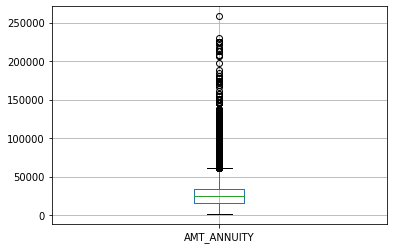

In [47]:
app_train.boxplot('AMT_ANNUITY')

In [48]:
# 檢查欄位缺值數量 (去掉.head()可以顯示全部)
isnullCols = app_train.isnull().sum().sort_values(ascending=False)
isnullCols[isnullCols>0]

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 68, dtype: int64

In [49]:
app_train['AMT_ANNUITY'].fillna(app_train["AMT_ANNUITY"].median(), inplace=True)

In [50]:
cut_rule = [0, 10000, 20000, 30000, 40000, 260000]
app_train['AMT_ANNUITY_GRP'] = pd.cut(app_train['AMT_ANNUITY'], bins = cut_rule)


In [51]:
isnullCols2 = app_train.isnull().sum().sort_values(ascending=False)
isnullCols2[isnullCols2>0]

COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
DEF_30_CNT_SOCIAL_CIRCLE      1021
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64

In [52]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,AMT_ANNUITY_GRP
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,"(20000, 30000]"
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(30000, 40000]"
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(0, 10000]"
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,"(20000, 30000]"
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(20000, 30000]"


In [53]:
amt_annuity_grp_sorted = sorted(app_train['AMT_ANNUITY_GRP'].unique())
amt_annuity_grp_sorted

[Interval(0, 10000, closed='right'),
 Interval(10000, 20000, closed='right'),
 Interval(20000, 30000, closed='right'),
 Interval(30000, 40000, closed='right'),
 Interval(40000, 260000, closed='right')]

In [54]:
print(app_train['AMT_ANNUITY_GRP'].value_counts())

(20000, 30000]     92478
(10000, 20000]     83222
(30000, 40000]     58562
(40000, 260000]    49966
(0, 10000]         23283
Name: AMT_ANNUITY_GRP, dtype: int64


<AxesSubplot:xlabel='AMT_ANNUITY_GRP', ylabel='count'>

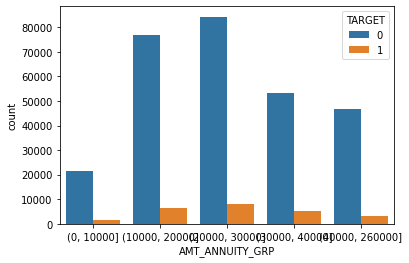

In [61]:
sns.countplot(x='AMT_ANNUITY_GRP', hue='TARGET', data=app_train)

In [63]:
# 確定只有 int64, float64, object 三種類型後對欄位名稱執行迴圈, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
# .dtypes(欄位類型), .columns(欄位名稱) 是 DataFrame 提供的兩個方法, 這裡順便展示一下 for 與 zip 搭配的用法
for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)

In [69]:
corr = app_train.select_dtypes(include=['float64', 'int64']).corr()


<AxesSubplot:>

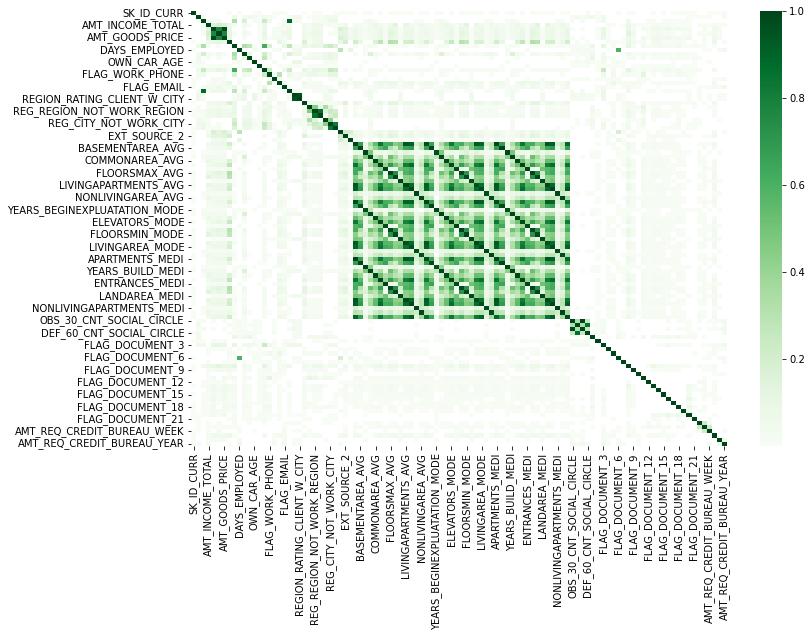

In [87]:
kot = corr[corr>=.0]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [88]:
kot

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000849,NaN,0.001366,...,0.000509,0.000167,0.001073,0.000282,NaN,NaN,0.002099,0.000485,0.001025,0.004659
TARGET,NaN,1.000000,0.019187,NaN,NaN,NaN,NaN,NaN,0.078239,NaN,...,NaN,NaN,0.000215,0.003709,0.000930,0.002704,0.000788,NaN,NaN,0.019930
CNT_CHILDREN,NaN,0.019187,1.000000,0.012882,0.002145,0.021374,NaN,NaN,0.330938,NaN,...,0.004031,0.000864,0.000988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,NaN,NaN,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,NaN,...,0.003130,0.002408,0.000242,NaN,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,NaN,NaN,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,NaN,NaN,...,0.034329,0.021082,0.031023,NaN,NaN,0.004238,NaN,0.054451,0.015925,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,NaN,0.002704,NaN,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,NaN,NaN,0.230374,1.000000,0.217412,NaN,NaN,NaN
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,NaN,0.002387,NaN,0.013881,NaN,NaN,NaN,0.003072,...,NaN,NaN,NaN,0.000081,0.004706,0.217412,1.000000,NaN,NaN,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,NaN,NaN,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,NaN,...,NaN,NaN,0.001285,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,NaN,NaN,0.004859,0.015925,0.010124,0.016432,NaN,NaN,0.015345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.076208


In [91]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlacion"]
    correlation = correlation.reindex(correlation.Correlacion.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)

top_correlation(app_train,100)

/tmp/ipykernel_41924/1974080875.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,Variable_1,Variable_2,Correlacion
0,DAYS_EMPLOYED,FLAG_EMP_PHONE,-0.999755
1,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,0.998495
2,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998490
3,FLOORSMIN_AVG,FLOORSMIN_MEDI,0.997241
4,FLOORSMAX_AVG,FLOORSMAX_MEDI,0.997034
...,...,...,...
95,APARTMENTS_MEDI,ELEVATORS_MEDI,0.837447
96,APARTMENTS_AVG,ELEVATORS_AVG,0.836958
97,APARTMENTS_AVG,ELEVATORS_MEDI,0.835123
98,ELEVATORS_AVG,APARTMENTS_MEDI,0.834523


In [93]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

gt07 = corrFilter(app_train, .7)

In [99]:
for index, val in gt07.iteritems():
    print(index, val)

('FLAG_EMP_PHONE', 'DAYS_EMPLOYED') -0.999755011444388
('FLOORSMAX_AVG', 'FLOORSMIN_MODE') 0.7222429236174579
('FLOORSMIN_MODE', 'FLOORSMAX_MEDI') 0.7229700159170199
('FLOORSMIN_MODE', 'FLOORSMAX_MODE') 0.7263342615133062
('FLOORSMAX_MODE', 'FLOORSMIN_AVG') 0.7291792769404015
('FLOORSMAX_MODE', 'FLOORSMIN_MEDI') 0.7298710195195898
('FLOORSMIN_MEDI', 'FLOORSMAX_AVG') 0.7398936452225403
('FLOORSMAX_MEDI', 'FLOORSMIN_AVG') 0.7399277449393056
('FLOORSMAX_MEDI', 'FLOORSMIN_MEDI') 0.7404123089687457
('FLOORSMIN_AVG', 'FLOORSMAX_AVG') 0.7424367124625478
('AMT_ANNUITY', 'AMT_CREDIT') 0.7701380033118846
('AMT_GOODS_PRICE', 'AMT_ANNUITY') 0.7751092733120319
('ELEVATORS_MODE', 'LIVINGAPARTMENTS_AVG') 0.7941591886582979
('LIVINGAPARTMENTS_MODE', 'ELEVATORS_AVG') 0.7970600160213059
('LIVINGAPARTMENTS_MODE', 'ELEVATORS_MEDI') 0.7987303033589754
('ELEVATORS_MODE', 'LIVINGAPARTMENTS_MEDI') 0.7994382242546297
('ELEVATORS_AVG', 'APARTMENTS_MODE') 0.8060090307264132
('ELEVATORS_MODE', 'LIVINGAPARTMENTS_M